In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import sys
print(sys.version)

3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]


In [3]:
conda install kneed

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - kneed

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [4]:
!pip install --upgrade Kneed

Requirement already up-to-date: Kneed in c:\users\asus\anaconda3\lib\site-packages (0.7.0)


In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.mixture import GaussianMixture 
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import argparse
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

In [6]:
from kneed import KneeLocator

In [7]:
data=pd.read_excel("Desktop\marketing_campaign.xlsx")

In [8]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null datetime64[ns]
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3        

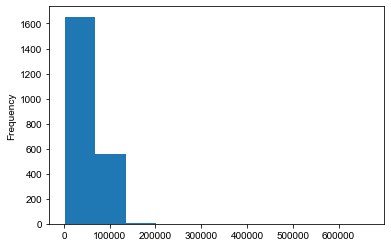

In [10]:
data['Income'].plot.hist();
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

In [11]:
median = data['Income'].median()

In [12]:
data['Income'].fillna(median, inplace = True)

In [13]:
data['Income'].isnull().sum()

0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2240 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null datetime64[ns]
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3        

In [15]:
data.size

64960

In [16]:
data1 = data.copy() # A copy of the data set is made for the EDA process and for future transformations

In [17]:
data1.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0


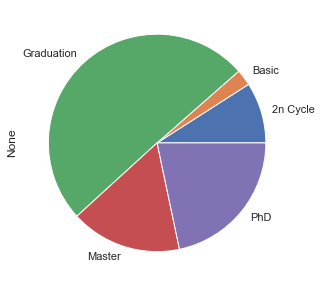

In [18]:
data1.groupby('Education').size().plot(kind = 'pie')
sns.set(rc={'figure.figsize':(4,4)})

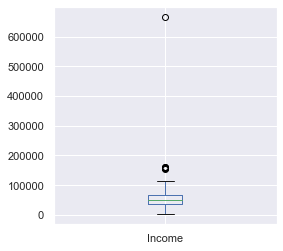

In [19]:
data1['Income'].plot(kind='box') # Income corresponds to the income of the clients

sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

# Customer Complaints Information

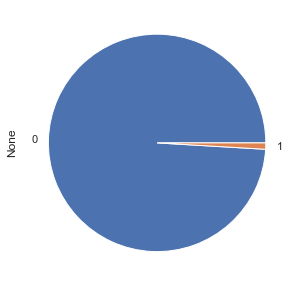

In [20]:
data1.groupby('Complain').size().plot(kind = 'pie')
sns.set(rc={'figure.figsize':(4,4)})

# Information Level of Customer Response to Campaigns

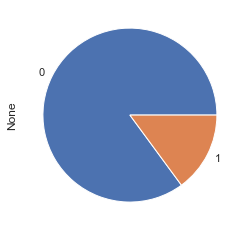

In [21]:
data1.groupby('Response').size().plot(kind = 'pie') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

In [22]:
data2 = data1.copy()

In [23]:
# You have to transform categorical variables (object) to numeric to be able to work with them
data2.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [24]:
data2['Dt_Customer'] = pd.to_datetime(data2.Dt_Customer)

In [25]:
data2['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
5      2013-09-09
6      2012-11-13
7      2013-05-08
8      2013-06-06
9      2014-03-13
10     2013-11-15
11     2012-11-13
12     2013-11-15
13     2013-11-15
14     2012-10-10
15     2012-11-24
16     2012-12-24
17     2012-08-31
18     2013-03-28
19     2012-11-03
20     2012-08-08
21     2013-01-06
22     2012-12-23
23     2014-01-11
24     2013-03-18
25     2013-01-02
26     2013-05-27
27     2013-02-20
28     2013-05-31
29     2013-11-22
          ...    
2210   2013-02-13
2211   2014-02-05
2212   2014-05-01
2213   2012-10-12
2214   2013-07-30
2215   2012-12-20
2216   2013-03-21
2217   2014-04-05
2218   2013-06-19
2219   2012-10-14
2220   2013-11-26
2221   2013-07-04
2222   2013-05-07
2223   2014-06-25
2224   2014-01-09
2225   2012-09-26
2226   2013-03-24
2227   2013-03-03
2228   2012-08-12
2229   2014-05-18
2230   2013-03-16
2231   2012-08-21
2232   2012-08-17
2233   2013-06-02
2234   201

In [26]:
obj_df = data2.select_dtypes(include=['object']).copy()# the categorical variables (object) are chosen and a copy is made
print(obj_df.columns)

Index(['Education', 'Marital_Status'], dtype='object')


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
lb_encoder = LabelEncoder()

In [29]:
#create a for loop so that each of the variables that have 'object' format is changed to number format
for col in obj_df.columns:
  data2[col] = lb_encoder.fit_transform(data2[col])

In [30]:
data2.dtypes # Checking a new type of variables

ID                              int64
Year_Birth                      int64
Education                       int32
Marital_Status                  int32
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [31]:
data2['Age'] = 2014 - data2['Year_Birth'] 
# the 2014 date is chosen because it corresponds to the date where the study was apparently carried out or the date

# where the dataset comes from. Age would be the age of the clients as of 2014

In [32]:
data2['Age'].head(5)

0    57
1    60
2    49
3    30
4    33
Name: Age, dtype: int64

In [33]:
data2['age_range'] = (data2['Age']//5)*5 # a column is created which corresponds to the range of

In [34]:
round(data2.pivot_table(['Income'],['age_range'],aggfunc= 'mean',fill_value=0),2)
#A table that allows you to see the Income by Age Ranges

,Income
age_range,
15,46658.00
20,53683.17
25,43849.21
30,47567.93
35,50199.41
40,49754.75
45,52235.09
50,55498.55
55,56651.57


# Customer Response Information, by Age Range and Income Level

In [35]:
round(data2.pivot_table(['Income'],['age_range'],['Response'],aggfunc= 'mean',fill_value=0),2)
# Response 1 indicates if the customer accepted the offer in the last campaign, 0 if not.

Income          
Response          0         1
age_range                    
15         47169.80  45378.50
20         45447.38  82508.42
25         41942.80  55807.64
30         44090.53  59777.49
35         49649.64  54639.90
40         48883.83  53977.36
45         51511.21  57509.11
50         54076.08  65049.43
55         54758.11  68336.91
60         55579.22  61810.50
65         62803.75  66809.77
70         67080.67  57466.62
110        36640.00      0.00
115        83532.00      0.00
120        60182.00      0.00

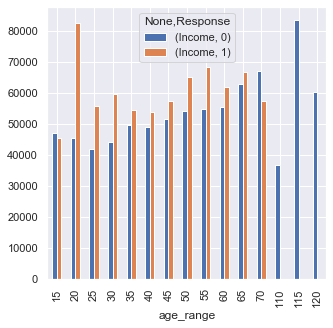

In [36]:
round(data2.pivot_table(['Income'],['age_range'],['Response'],aggfunc= 'mean',fill_value=0),2).plot(kind = 'bar' ) 
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

In [37]:
round(data2.pivot_table(['Income'],['age_range'],['Education'],aggfunc= 'mean',fill_value=0),2)


Income                                        
Education         0         1         2         3         4
age_range                                                  
15         57124.67  14421.00  46937.00      0.00      0.00
20         48948.80  18012.43  55769.06  81595.40  69926.00
25         32391.86  17403.20  46690.32  45802.89  53447.83
30         48668.90  25161.50  46197.49  41956.15  58285.64
35         39110.54  20756.83  53765.49  48525.91  55874.16
40         43827.58  18949.17  49222.01  52869.23  52596.16
45         59966.14  22796.75  52631.61  49687.66  53684.20
50         59967.78  23384.75  55747.72  58262.46  54169.41
55         58727.09  15056.00  56723.76  56986.33  56075.75
60         58877.89  20040.50  56744.48  53599.18  58446.58
65         77951.50  28389.00  62447.84  64005.14  64611.38
70             0.00      0.00  67273.33  63848.50  64221.50
110        36640.00      0.00      0.00      0.00      0.00
115            0.00      0.00      0.00      0.00  83532.00
120        60182.00      0.00      0.00      0.00      0.00

In [38]:
data2['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
5      2013-09-09
6      2012-11-13
7      2013-05-08
8      2013-06-06
9      2014-03-13
10     2013-11-15
11     2012-11-13
12     2013-11-15
13     2013-11-15
14     2012-10-10
15     2012-11-24
16     2012-12-24
17     2012-08-31
18     2013-03-28
19     2012-11-03
20     2012-08-08
21     2013-01-06
22     2012-12-23
23     2014-01-11
24     2013-03-18
25     2013-01-02
26     2013-05-27
27     2013-02-20
28     2013-05-31
29     2013-11-22
          ...    
2210   2013-02-13
2211   2014-02-05
2212   2014-05-01
2213   2012-10-12
2214   2013-07-30
2215   2012-12-20
2216   2013-03-21
2217   2014-04-05
2218   2013-06-19
2219   2012-10-14
2220   2013-11-26
2221   2013-07-04
2222   2013-05-07
2223   2014-06-25
2224   2014-01-09
2225   2012-09-26
2226   2013-03-24
2227   2013-03-03
2228   2012-08-12
2229   2014-05-18
2230   2013-03-16
2231   2012-08-21
2232   2012-08-17
2233   2013-06-02
2234   201

In [39]:
data2.groupby('Dt_Customer').size()

Dt_Customer
2012-07-30    1
2012-07-31    1
2012-08-01    4
2012-08-02    3
2012-08-03    5
2012-08-04    4
2012-08-05    1
2012-08-06    3
2012-08-07    4
2012-08-08    7
2012-08-09    2
2012-08-10    2
2012-08-11    3
2012-08-12    6
2012-08-13    2
2012-08-14    2
2012-08-15    1
2012-08-16    3
2012-08-17    8
2012-08-18    5
2012-08-19    2
2012-08-20    3
2012-08-21    2
2012-08-22    8
2012-08-23    1
2012-08-24    2
2012-08-25    3
2012-08-26    3
2012-08-27    3
2012-08-28    2
             ..
2014-05-30    1
2014-05-31    2
2014-06-02    2
2014-06-03    2
2014-06-04    1
2014-06-05    3
2014-06-06    1
2014-06-07    3
2014-06-08    4
2014-06-09    3
2014-06-10    3
2014-06-11    1
2014-06-12    1
2014-06-13    1
2014-06-14    1
2014-06-15    4
2014-06-16    4
2014-06-17    3
2014-06-18    3
2014-06-19    4
2014-06-20    2
2014-06-21    2
2014-06-22    5
2014-06-23    2
2014-06-24    2
2014-06-25    5
2014-06-26    4
2014-06-27    3
2014-06-28    3
2014-06-29    2
Length: 663,

In [40]:
data2['Year'] = data2['Dt_Customer'].dt.year

In [41]:
data2.groupby('Year').size()

Year
2012     494
2013    1189
2014     557
dtype: int64

In [42]:
average_purchases= data2[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',\
                          'Year']].groupby("Year").mean().sort_values(by="Year").reset_index()

In [43]:
average_purchases.head(5)

,Year,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,2012,388.803644,29.718623,197.524291,44.473684,31.951417,53.012146
1,2013,300.317073,26.291001,165.540791,36.513036,26.904962,46.136249
2,2014,236.391382,23.296230,142.842011,33.524237,23.064632,31.535009


# Product Trend Through Time

In [44]:
round(data2.pivot_table(['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],\
                        ['Year'], aggfunc= 'mean',fill_value=0),2)

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Year,,,,,,
2012,44.47,29.72,53.01,197.52,31.95,388.80
2013,36.51,26.29,46.14,165.54,26.90,300.32
2014,33.52,23.30,31.54,142.84,23.06,236.39


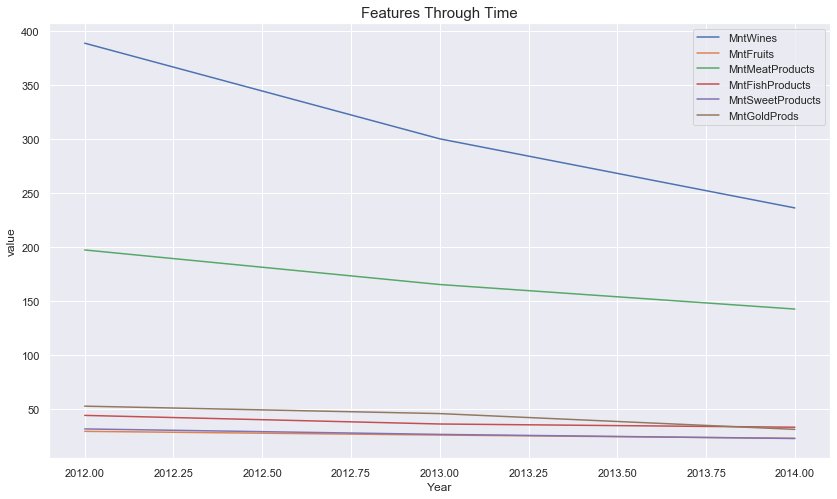

In [45]:
plt.figure(figsize=(14,8))
plt.title("Features Through Time", fontdict={"fontsize": 15})

lines = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

for line in lines:
    ax = sns.lineplot(x='Year', y=line, data=average_purchases)
plt.ylabel("value")
plt.legend(lines)
# The purchase level of customers is decreasing (Customers are buying less)

# Copra Behavior According to Marital Status

In [46]:
data2.pivot_table('NumWebPurchases', index= ('Marital_Status'), aggfunc='mean')

,NumWebPurchases
Marital_Status,
0,3.500000
1,5.000000
2,4.310345
3,4.087963
4,3.872917
5,4.081034
6,4.623377
7,7.000000


In [47]:
data2['Total_spend'] = data2['MntWines']+data2['MntFruits']+data2['MntMeatProducts']+data2['MntFishProducts']\
+data2['MntSweetProducts']+data2['MntGoldProds']

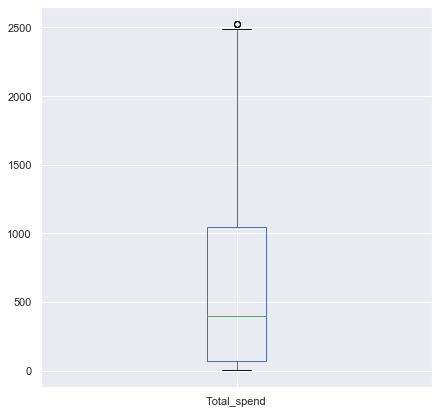

In [48]:
data2['Total_spend'].plot(kind='box') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()


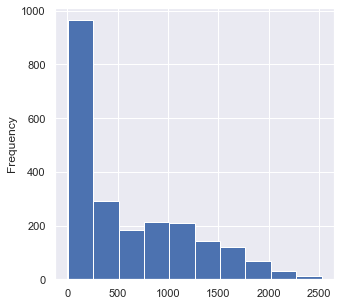

In [49]:
data2['Total_spend'].plot(kind='hist') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

# Customers by Marital Status, by Response to Campaign and Total Purchase Amount

In [50]:
round(data2.pivot_table(['Total_spend'],['Marital_Status'],['Response'],aggfunc= 'mean',fill_value=0),2)
# 1 indicates if the customer accepted the offer in the last campaign, 0 if not.

Total_spend         
Response                 0        1
Marital_Status                     
0                  1169.00  1216.00
1                   360.50    49.00
2                   510.58   994.15
3                   542.52   968.18
4                   496.66   993.99
5                   562.04  1010.08
6                   644.10  1027.95
7                   424.00   424.00

In [51]:
data2['Total_Sons'] = data2['Kidhome']+data2['Teenhome']

In [52]:
data2['Total_Sons'].head(3)

0    0
1    2
2    0
Name: Total_Sons, dtype: int64

In [53]:
data2['Total_Sons'].mean() 

0.9504464285714286

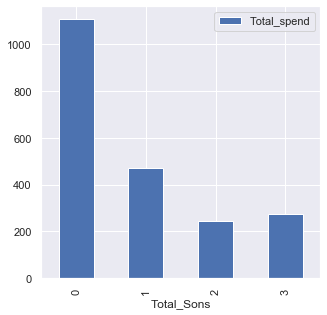

In [54]:
round(data2.pivot_table(['Total_spend'],['Total_Sons'],aggfunc= 'mean',fill_value=0),2).plot(kind = 'bar') 

# Feature Correlations

In [55]:
data2.corr()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,age_range,Year,Total_spend,Total_Sons
ID,1.000000,0.000028,-0.003839,0.019580,0.012996,0.002406,-0.002580,-0.046524,-0.022878,0.004600,...,-0.015061,0.033883,NaN,NaN,-0.021968,-0.000028,0.004823,-0.006414,-0.018054,-0.000146
Year_Birth,0.000028,1.000000,-0.171390,-0.060580,-0.160899,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,...,-0.006539,-0.030128,NaN,NaN,0.021325,-1.000000,-0.992990,-0.028188,-0.111306,-0.090199
Education,-0.003839,-0.171390,1.000000,0.007090,0.119979,-0.045564,0.118485,-0.011728,0.197576,-0.080412,...,0.021369,-0.050540,NaN,NaN,0.090819,0.171390,0.174351,0.045356,0.092054,0.053189
Marital_Status,0.019580,-0.060580,0.007090,1.000000,0.021145,-0.022553,-0.003596,0.014159,0.008205,0.000593,...,0.018417,-0.005718,NaN,NaN,-0.011403,0.060580,0.059584,-0.018176,0.020713,-0.018756
Income,0.012996,-0.160899,0.119979,0.021145,1.000000,-0.425326,0.018965,-0.004061,0.576903,0.428791,...,0.087581,-0.027187,NaN,NaN,0.132867,0.160899,0.158731,0.022381,0.664775,-0.290858
Kidhome,0.002406,0.230176,-0.045564,-0.022553,-0.425326,1.000000,-0.036133,0.008827,-0.496297,-0.372581,...,-0.081716,0.040207,NaN,NaN,-0.080008,-0.230176,-0.228282,0.053339,-0.556669,0.689971
Teenhome,-0.002580,-0.352111,0.118485,-0.003596,0.018965,-0.036133,1.000000,0.016198,0.004846,-0.176764,...,-0.015605,0.003138,NaN,NaN,-0.154446,0.352111,0.346441,-0.008260,-0.138384,0.698433
Recency,-0.046524,-0.019871,-0.011728,0.014159,-0.004061,0.008827,0.016198,1.000000,0.016064,-0.004306,...,-0.001781,0.013231,NaN,NaN,-0.198437,0.019871,0.023418,-0.026084,0.020433,0.018053
MntWines,-0.022878,-0.157773,0.197576,0.008205,0.576903,-0.496297,0.004846,0.016064,1.000000,0.389637,...,0.205907,-0.039007,NaN,NaN,0.247254,0.157773,0.157840,-0.154188,0.891839,-0.351909
MntFruits,0.004600,-0.017917,-0.080412,0.000593,0.428791,-0.372581,-0.176764,-0.004306,0.389637,1.000000,...,-0.009773,-0.005166,NaN,NaN,0.125289,0.017917,0.017495,-0.055150,0.614229,-0.394853


In [56]:
data2.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,age_range,Year,Total_spend,Total_Sons
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,57,55,2012,1617,0
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,60,60,2014,27,2


In [57]:
data2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'age_range', 'Year', 'Total_spend', 'Total_Sons'],
      dtype='object')

In [58]:
data3 = data2.iloc[:,[2,3,4,8,33,32,29,25,23,28,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]

In [59]:
data3.head(2)

,Education,Marital_Status,Income,Recency,Total_Sons,Total_spend,Age,Complain,AcceptedCmp1,Response,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4
0,2,4,58138.0,58,0,1617,57,0,0,1,...,172,88,88,3,8,10,4,7,0,0
1,2,4,46344.0,38,2,27,60,0,0,0,...,2,1,6,2,1,1,2,5,0,0


# Correlation Diagram - Spearman Method

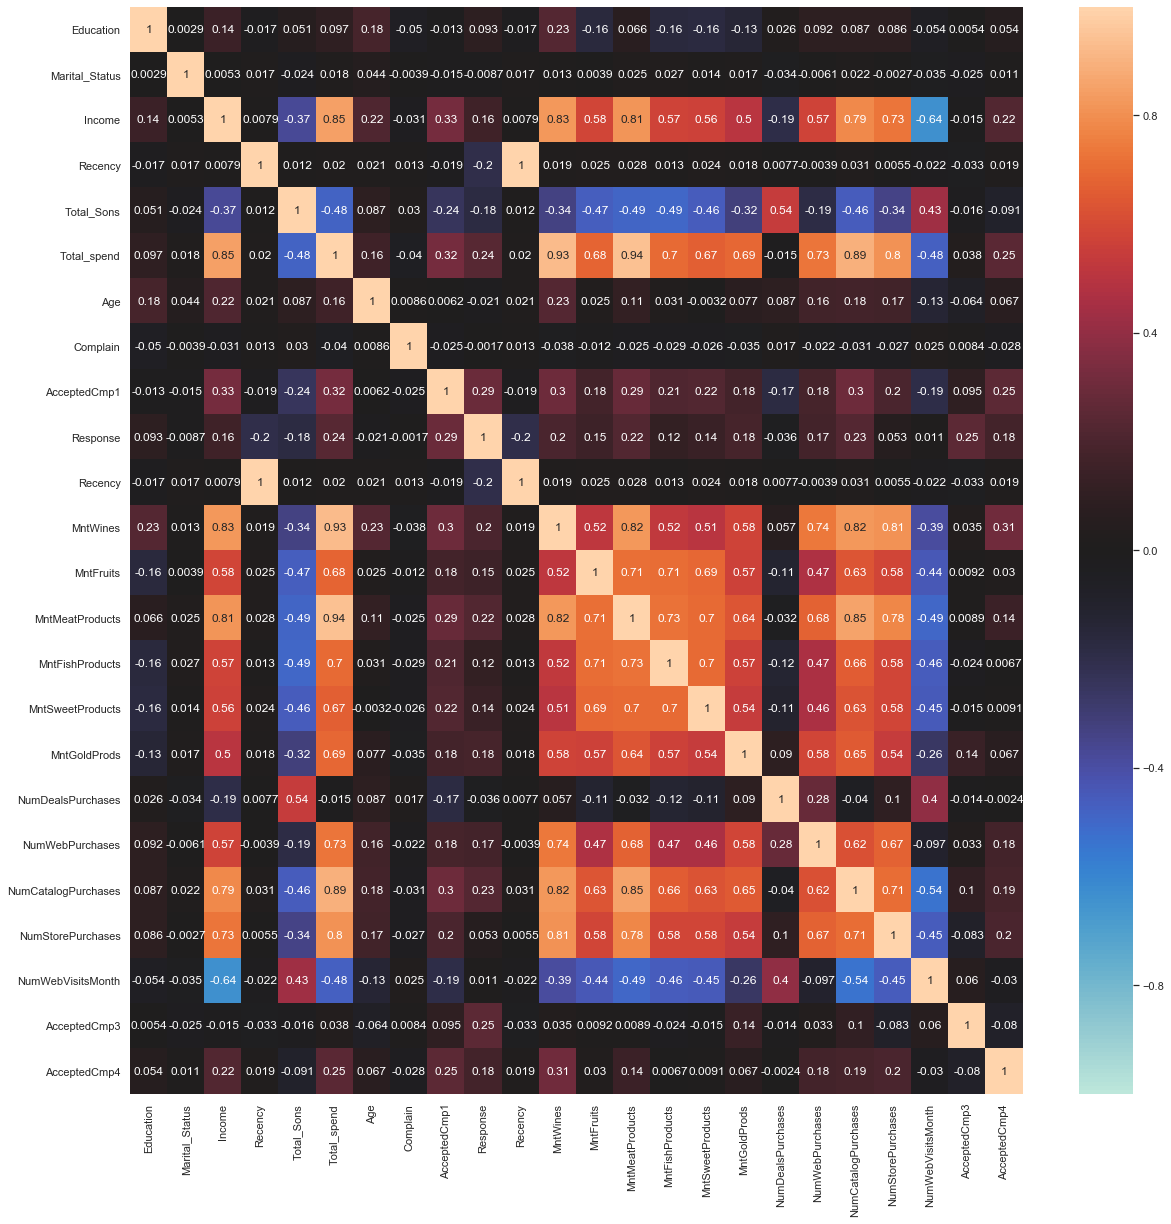

In [60]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(data3.corr(method='spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

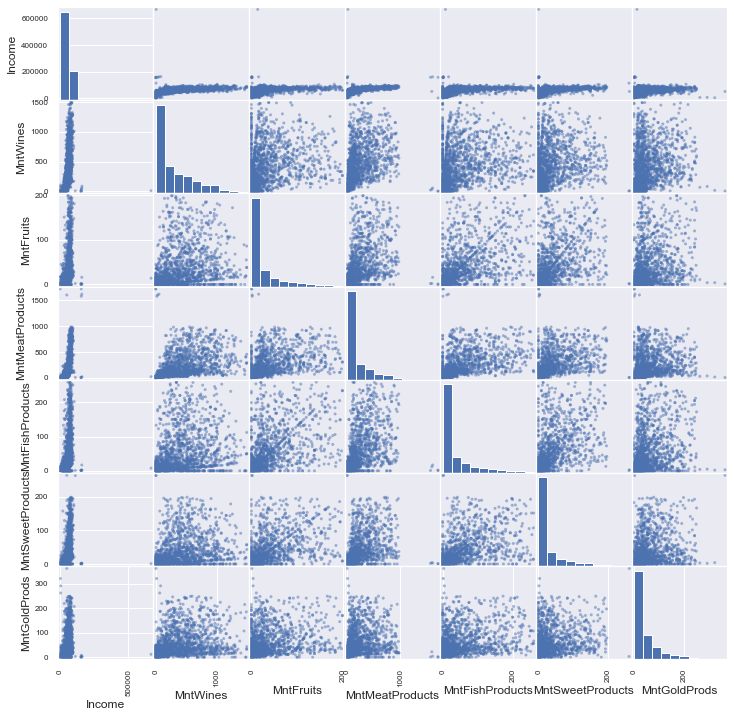

In [61]:
from pandas.plotting import scatter_matrix 
scatter_matrix((data2[['Income',"MntWines","MntFruits",'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]),figsize = (12, 12));

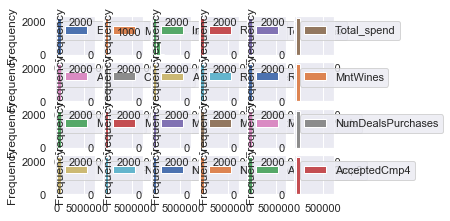

In [62]:
data3.plot(kind='hist',subplots=True, layout=(6,6), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(18,18)})
plt.show()

# ANOVA

In [63]:
import scipy.stats as stats

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
lb_encoder = LabelEncoder()

In [120]:
print("Influence of the Answer bell on the web view") 
print(stats.f_oneway(data3[data3["Response"]== 0]["NumWebVisitsMonth"], data3[data3["Response"]== 1]["NumWebVisitsMonth"]))
print()
print("Influence of the Bell Response on the purchase of fruits") 
print(stats.f_oneway(data3[data3["Response"]== 0]["MntFruits"], data3[data3["Response"]== 1]["MntFruits"]))
print()
print("Influence of the Answer bell on the Last purchase") 
print(stats.f_oneway(data3[data3["Response"]== 0]["Recency"], data3[data3["Response"]== 1]["Recency"]))
print()

Influence of the Answer bell on the web view
F_onewayResult(statistic=0.09784184442733439, pvalue=0.7544642876075662)

Influence of the Bell Response on the purchase of fruits
F_onewayResult(statistic=35.15426489283795, pvalue=3.52064338917274e-09)

Influence of the Answer bell on the Last purchase
F_onewayResult(statistic=array([91.89905983, 91.89905983]), pvalue=array([2.33888226e-21, 2.33888226e-21]))



# Clustors

In [67]:
X = data3 # Renaming variable for use in Scikit-Learn
X.head(3)

,Education,Marital_Status,Income,Recency,Total_Sons,Total_spend,Age,Complain,AcceptedCmp1,Response,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4
0,2,4,58138.0,58,0,1617,57,0,0,1,...,172,88,88,3,8,10,4,7,0,0
1,2,4,46344.0,38,2,27,60,0,0,0,...,2,1,6,2,1,1,2,5,0,0
2,2,5,71613.0,26,0,776,49,0,0,0,...,111,21,42,1,8,2,10,4,0,0


In [68]:
#Normalizing dataframe
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [69]:
pca = PCA()
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [70]:
evr = pca.explained_variance_ratio_
evr

array([2.95039170e-01, 8.76759115e-02, 7.78150389e-02, 5.95250206e-02,
       5.72979356e-02, 4.55044092e-02, 4.22801535e-02, 4.16282148e-02,
       3.53745153e-02, 3.22685146e-02, 2.93536660e-02, 2.69756117e-02,
       2.51299505e-02, 2.27556145e-02, 2.15295486e-02, 1.83440765e-02,
       1.76647375e-02, 1.59915604e-02, 1.52111539e-02, 1.28640295e-02,
       1.05551940e-02, 9.21597300e-03, 3.26251518e-33, 2.02702248e-33])

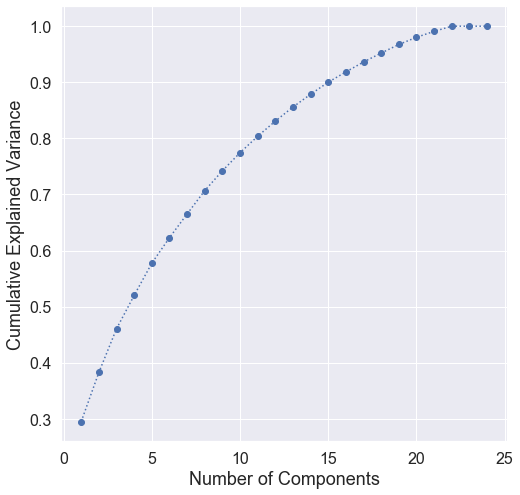

In [71]:
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, len(X.columns)+1), evr.cumsum(), marker='o', linestyle=':')
plt.xlabel('Number of Components', fontsize=18)
plt.ylabel('Cumulative Explained Variance',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [72]:
for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Number of Optimal Components:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(X_std)
scores_pca = pca.transform(X_std)

Number of Optimal Components: 11


In [73]:
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Number of Optimal Clusters:", n_clusters)

Number of Optimal Clusters: 6


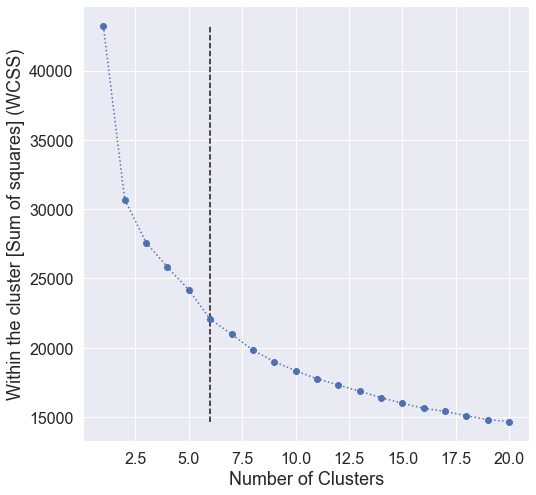

In [74]:
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle=':')
plt.vlines(KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', 
                       direction='decreasing').knee, ymin=min(wcss), ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within the cluster [Sum of squares] (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [75]:
# Creating parameter optimization with PCA and K-Means
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca);

In [76]:
# Labeling each of the data within the respective cluster
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca);

# Creating data visualization with PCA

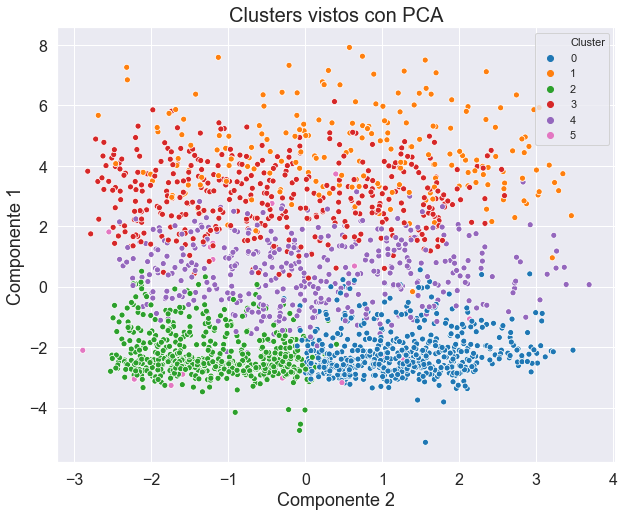

In [118]:
x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink'])
plt.title('Clusters vistos con PCA', fontsize=20)
plt.xlabel("Componente 2", fontsize=18)
plt.ylabel("Componente 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();

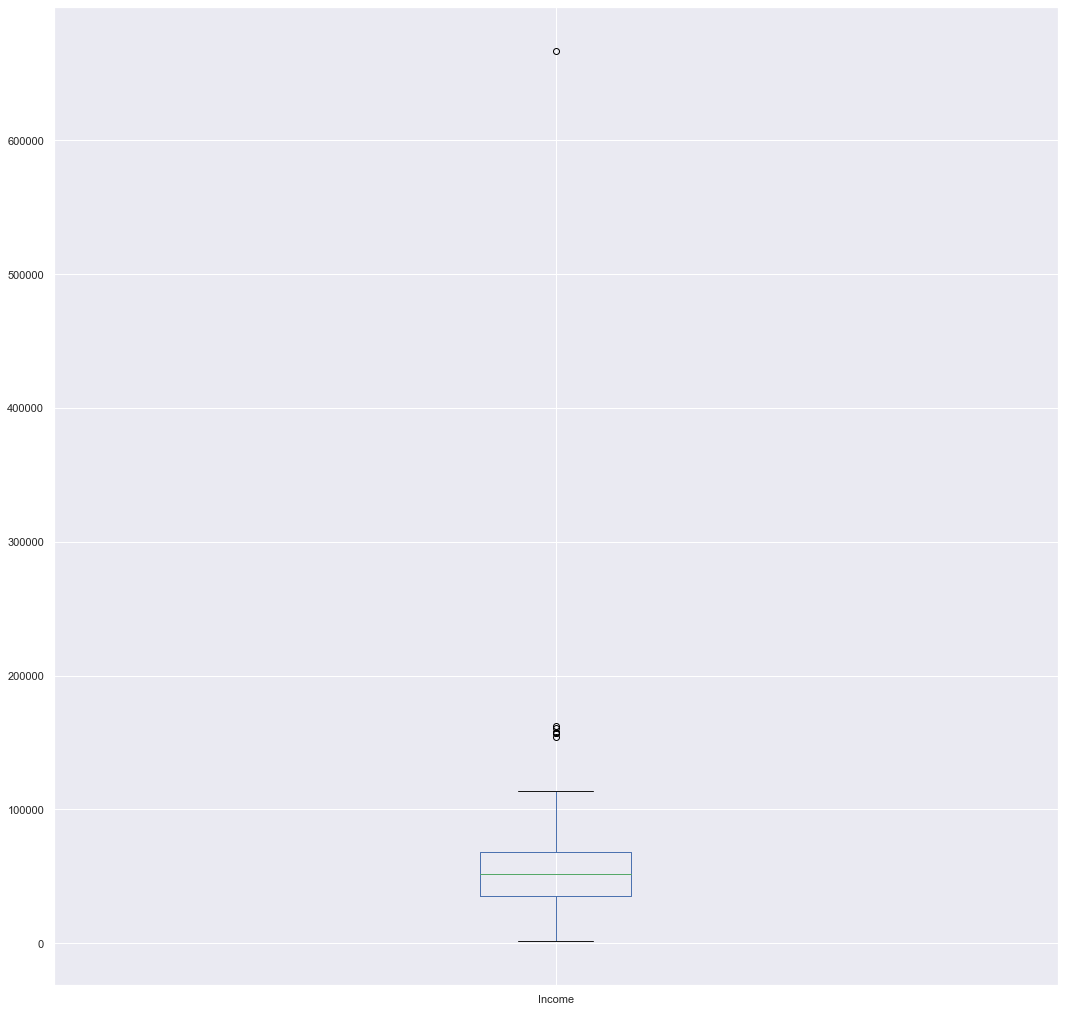

In [78]:
data3['Income'].plot(kind='box')
sns.set(rc={'figure.figsize':(4,4)})
plt.show()

In [80]:
quantiles1 = np.percentile(data3['Income'], [25,50,75])
quantiles1

array([35538.75, 51381.5 , 68289.75])

In [81]:
median1 = quantiles1[1]
IQR1 = quantiles1[2]-quantiles1[0]
sigma1 = 0.75*IQR1

In [82]:
data3 = data3.query("(Income > @median1 - 4*@sigma1) & (Income < @median1 + 4*@sigma1)")

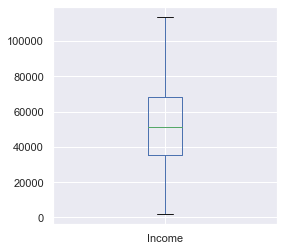

In [83]:
data3['Income'].plot(kind='box')
sns.set(rc={'figure.figsize':(4,4)})
plt.show()

In [84]:
data3.head(2)

,Education,Marital_Status,Income,Recency,Total_Sons,Total_spend,Age,Complain,AcceptedCmp1,Response,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4
0,2,4,58138.0,58,0,1617,57,0,0,1,...,172,88,88,3,8,10,4,7,0,0
1,2,4,46344.0,38,2,27,60,0,0,0,...,2,1,6,2,1,1,2,5,0,0


In [85]:
data3.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'Total_Sons',
       'Total_spend', 'Age', 'Complain', 'AcceptedCmp1', 'Response', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4'],
      dtype='object')

In [86]:
data4 = data3.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,22]]

In [87]:
data4.head(3)

,Education,Marital_Status,Income,Recency,Total_Sons,Total_spend,Age,Complain,AcceptedCmp1,Response,Recency,AcceptedCmp3
0,2,4,58138.0,58,0,1617,57,0,0,1,58,0
1,2,4,46344.0,38,2,27,60,0,0,0,38,0
2,2,5,71613.0,26,0,776,49,0,0,0,26,0


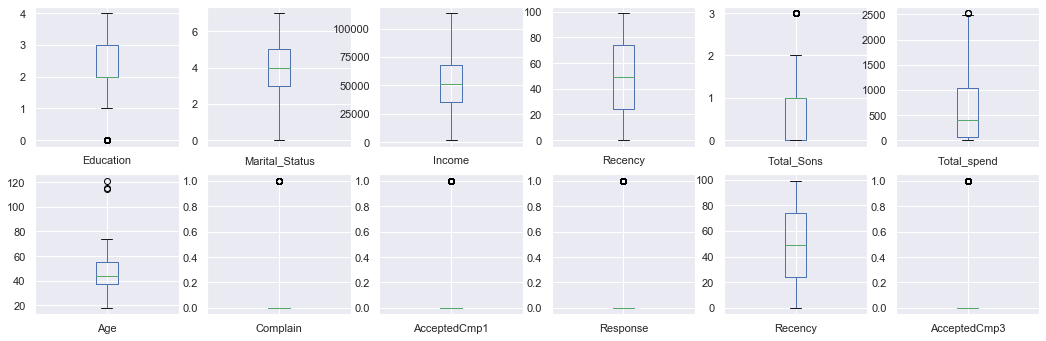

In [91]:
data4.plot(kind='box',subplots=True, layout=(6,6), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(18,18)})
plt.show()

In [89]:
X = data4 # Renaming variable for use in Scikit-Learn

In [90]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [92]:
pca = PCA()
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [93]:
evr = pca.explained_variance_ratio_
evr

array([2.12715971e-01, 1.71947266e-01, 1.08049324e-01, 9.50427026e-02,
       8.46828591e-02, 8.27193460e-02, 6.82802343e-02, 6.41639675e-02,
       5.25782421e-02, 4.69899862e-02, 1.28301000e-02, 2.03460773e-33])

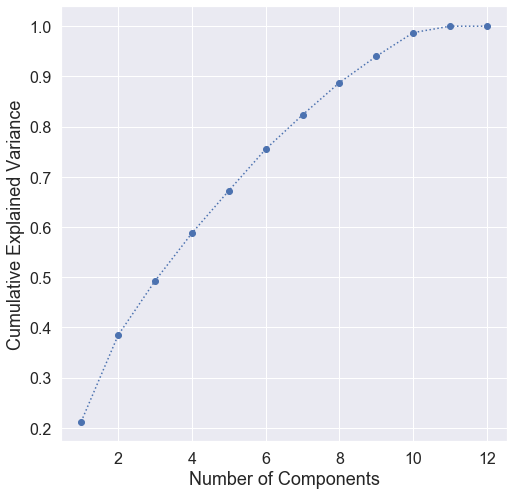

In [94]:
# Plotting Main Components graph
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, len(X.columns)+1), evr.cumsum(), marker='o', linestyle=':')
plt.xlabel('Number of Components', fontsize=18)
plt.ylabel('Cumulative Explained Variance',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# K-Means

In [95]:
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Number of Optimal Clusters:", n_clusters)

Number of Optimal Clusters: 6


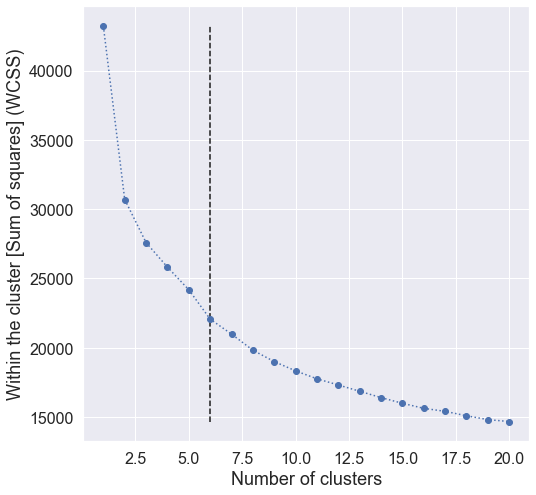

In [96]:
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle=':')
plt.vlines(KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', 
                       direction='decreasing').knee, ymin=min(wcss), ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of clusters', fontsize=18)
plt.ylabel('Within the cluster [Sum of squares] (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [97]:
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca);

In [98]:
# Labeling each of the data within the respective cluster
df_seg_pca_kmeans = pd.concat([pd.DataFrame(X.reset_index(drop=True)), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

,Education,Marital_Status,Income,Recency,Total_Sons,Total_spend,Age,Complain,AcceptedCmp1,Response,...,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11,Cluster
0,2.0,4.0,58138.0,58.0,0.0,1617.0,57.0,0.0,0.0,1.0,...,0.191203,-0.201830,1.564563,0.665789,0.358229,-0.707204,0.243959,0.713903,-2.362257,1
1,2.0,4.0,46344.0,38.0,2.0,27.0,60.0,0.0,0.0,0.0,...,-0.237438,-0.268923,-1.100528,0.454821,0.393154,-0.230558,1.381765,0.582666,0.413069,0
2,2.0,5.0,71613.0,26.0,0.0,776.0,49.0,0.0,0.0,0.0,...,-0.618975,-1.188575,-0.842669,-0.216329,0.342291,-0.989588,-0.293518,-1.294786,-0.159100,3
3,2.0,5.0,26646.0,26.0,1.0,53.0,30.0,0.0,0.0,0.0,...,-1.166040,-0.158809,-0.138273,-0.603742,0.157728,-1.082159,-0.910900,0.089321,0.266599,0
4,4.0,3.0,58293.0,94.0,1.0,422.0,33.0,0.0,0.0,0.0,...,0.904184,-0.096630,0.254089,0.219480,-1.004361,0.770829,-1.256762,1.051982,-0.403901,2


In [116]:
data2['Cluster'] = df_seg_pca_kmeans['Cluster']
data2.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,age_range,Year,Total_spend,Total_Sons,Cluster
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,57,55,2012,1617,0,1
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,60,60,2014,27,2,0
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,49,45,2013,776,0,3


In [115]:
pd.value_counts(data2['Cluster'])

2    564
0    560
4    443
3    436
1    216
5     21
Name: Cluster, dtype: int64

# Cluster and Income Information

In [102]:
round(df_seg_pca_kmeans.pivot_table('Income', index= 'Cluster', aggfunc= 'mean',fill_value=0),2)

,Income
Cluster,
0,50479.93
1,53982.65
2,51139.46
3,52546.70
4,51818.99
5,48401.14


# Cluster Information and Ages

In [103]:
round(df_seg_pca_kmeans.pivot_table('Age', index= 'Cluster', aggfunc= 'mean',fill_value=0),2)

,Age
Cluster,
0,44.58
1,44.50
2,45.41
3,45.77
4,45.46
5,46.86


# SUPERVISED MODEL

In [104]:
from pandas import read_csv 
import pandas as pd # management and structuring of data and its manipulation
from pandas.plotting import scatter_matrix #correlation diagrams
from matplotlib import pyplot #Make graphs in python
from sklearn.model_selection import train_test_split # manage to divide the samples
from sklearn.model_selection import cross_val_score # cross validation score
from sklearn.model_selection import StratifiedKFold #cross validation
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix #confusion matrix
from sklearn.metrics import accuracy_score #cross-validation score

In [105]:
# ML models with which to work
from sklearn.metrics import accuracy_score #cross-validation score
from sklearn.linear_model import LogisticRegression #Logistic regression
from sklearn.tree import DecisionTreeClassifier #decision trees
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Linear discriminant analysis
from sklearn.naive_bayes import GaussianNB #Gauss Bayesiana
from sklearn.svm import SVC # Vector Support Machines
from sklearn.model_selection import train_test_split

In [106]:
data4.head(3)

,Education,Marital_Status,Income,Recency,Total_Sons,Total_spend,Age,Complain,AcceptedCmp1,Response,Recency,AcceptedCmp3
0,2,4,58138.0,58,0,1617,57,0,0,1,58,0
1,2,4,46344.0,38,2,27,60,0,0,0,38,0
2,2,5,71613.0,26,0,776,49,0,0,0,26,0


In [107]:
# Split validation data set
# With 80% the model is created and with 20% it is trained

array = data4.values #data is now transformed into an array
X = array[:,[0,1,2,3,4,5,6,7,8,10,11]]  # the data is taken, without the classification class
y = array[:,9] # se toman los datos 

# The data is divided into training and test set, random_state = 0 is used so that it does not give
# different results if you run again.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [108]:
# Checking algorithms, stored in a list
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))

In [109]:
import warnings
warnings.filterwarnings('ignore')

resultados = []
names = []


# If you need both the index or name, as well as the element, use for index, element in list
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) # Statement of cross-validation, characteristics
    cv_resultados = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') # generates the precision of the cross validation and saves it in the variable cv_results in list
    resultados.append(cv_resultados) # generates the precision of the cross validation and saves it in the variable cv_results in arrays, this to make the boxplot.
    names.append (name) # names in arrays
    print('%s: %f (%f)' % (name, cv_resultados.mean(), cv_resultados.std()))

LR: 0.840915 (0.007581)
LDA: 0.861127 (0.033867)
KNN: 0.833087 (0.019411)
CART: 0.826908 (0.017269)
NB: 0.851027 (0.025354)
SVC: 0.849869 (0.010120)


In [110]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
prediccion = model.predict(X_test)

In [111]:
mc =pd.DataFrame(confusion_matrix(Y_test, prediccion, labels=[0,1]), 
                 index = [0,1],  
                 columns = [0,1])  
 
# Evaluating Predictions
print("ROC:", accuracy_score(Y_test, prediccion),sep='\n')
print("")
print("Matriz de Confusión:", mc,sep='\n')

ROC:
0.8791946308724832

Matriz de Confusión:
     0   1
0  374  21
1   33  19


In [112]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,2232.0,2.391129,1.124589,0.0,2.00,2.0,3.00,4.0
Marital_Status,2232.0,3.729391,1.075907,0.0,3.00,4.0,5.00,7.0
Income,2232.0,51630.926971,20601.679542,1730.0,35434.75,51381.5,68118.00,113734.0
Recency,2232.0,49.111111,28.952893,0.0,24.00,49.0,74.00,99.0
Total_Sons,2232.0,0.951613,0.751742,0.0,0.00,1.0,1.00,3.0
Total_spend,2232.0,605.596326,601.444172,5.0,69.00,396.5,1044.25,2525.0
Age,2232.0,45.207437,11.990340,18.0,37.00,44.0,55.00,121.0
Complain,2232.0,0.009409,0.096562,0.0,0.00,0.0,0.00,1.0
AcceptedCmp1,2232.0,0.064516,0.245725,0.0,0.00,0.0,0.00,1.0
Response,2232.0,0.149642,0.356800,0.0,0.00,0.0,0.00,1.0
